### Palmer Penguins

This notebook contains my analysis of the Palmer Penguins dataset
***

In [23]:
# DataFrames
import pandas as pd
# NumPy
import numpy as np
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

In [24]:
# Load the penguins data set from URL.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [25]:
# Look at data set. First 5 rows and last 5 rows.   
df 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# summary of dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# check missing values
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [26]:
# Check for missing values in each row
rows_missing_values = df[df.isna().any(axis=1)] # .any(axis=1) checks in each row


print("Rows with missing values:")
print(rows_missing_values)

Rows with missing values:
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         347

In [27]:

df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
# total counts in rows and columns

df.shape

(344, 7)

In [10]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [31]:
# removed 2 rows that had missing numerical data.

df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)    

In [12]:
df.describe()  #removed 2 values 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
# check number of rows and columns after removing missing values
df.shape

(342, 7)

In [14]:
# check missing values again
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [15]:
# describe the numeric data after removing missing values
df.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [16]:
# calculate the mean of each column by species
df.groupby('species').mean('body_mass_g')   

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [35]:
# Mean by species and sex.
numerical_variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate the mean for each combination of species and sex
mean = df.groupby(['species', 'sex'])[numerical_variables].mean()
print('Mean by species and sex:')
print(mean)

Mean by species and sex:
                  bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex                                                        
Adelie    FEMALE       37.257534      17.621918         187.794521   
          MALE         40.390411      19.072603         192.410959   
Chinstrap FEMALE       46.573529      17.588235         191.735294   
          MALE         51.094118      19.252941         199.911765   
Gentoo    FEMALE       45.563793      14.237931         212.706897   
          MALE         49.473770      15.718033         221.540984   

                  body_mass_g  
species   sex                  
Adelie    FEMALE  3368.835616  
          MALE    4043.493151  
Chinstrap FEMALE  3527.205882  
          MALE    3938.970588  
Gentoo    FEMALE  4679.741379  
          MALE    5484.836066  


In [34]:
# Mean by species, sex, and island.
numerical_variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Calculate the mean for each species, sex, and island
mean = df.groupby(['species', 'sex', 'island'])[numerical_variables].mean()
print('Mean by species and sex:')
print(mean)

Mean by species and sex:
                            bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex    island                                                        
Adelie    FEMALE Biscoe          37.359091      17.704545         187.181818   
                 Dream           36.911111      17.618519         187.851852   
                 Torgersen       37.554167      17.550000         188.291667   
          MALE   Biscoe          40.590909      19.036364         190.409091   
                 Dream           40.071429      18.839286         191.928571   
                 Torgersen       40.586957      19.391304         194.913043   
Chinstrap FEMALE Dream           46.573529      17.588235         191.735294   
          MALE   Dream           51.094118      19.252941         199.911765   
Gentoo    FEMALE Biscoe          45.563793      14.237931         212.706897   
          MALE   Biscoe          49.473770      15.718033         221.540984   

              

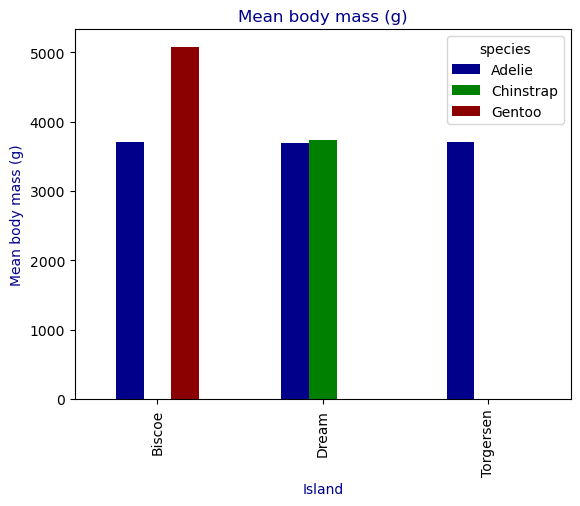

In [44]:
# bar chart body mass by island and species
df.groupby(['island', 'species'])['body_mass_g'].mean().unstack().plot(kind='bar', color=['darkblue', 'green', 'darkred'])
plt.ylabel('Mean body mass (g)', color='darkblue')
plt.xlabel('Island', color='darkblue')
plt.title('Mean body mass (g)', color='darkblue')
plt.show()

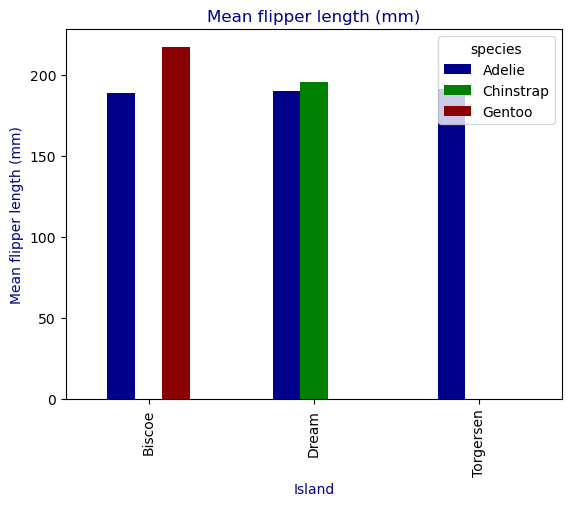

In [40]:
# bar chart flipper length by island and species
df.groupby(['island', 'species'])['flipper_length_mm'].mean().unstack().plot(kind='bar', color=['darkblue', 'green', 'darkred'])
plt.ylabel('Mean flipper length (mm)', color='darkblue')
plt.xlabel('Island', color='darkblue')
plt.title('Mean flipper length (mm)', color='darkblue')
plt.show()

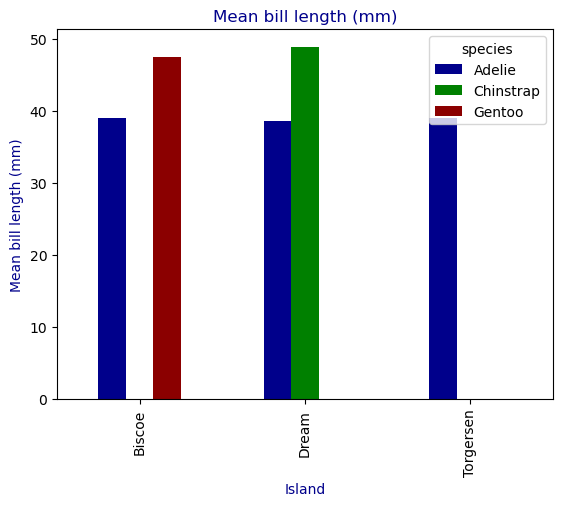

In [45]:
# bar chart bill length by island and species
df.groupby(['island', 'species'])['bill_length_mm'].mean().unstack().plot(kind='bar', color=['darkblue', 'green', 'darkred'])
plt.ylabel('Mean bill length (mm)', color='darkblue')
plt.xlabel('Island', color='darkblue')
plt.title('Mean bill length (mm)', color='darkblue')
plt.show()

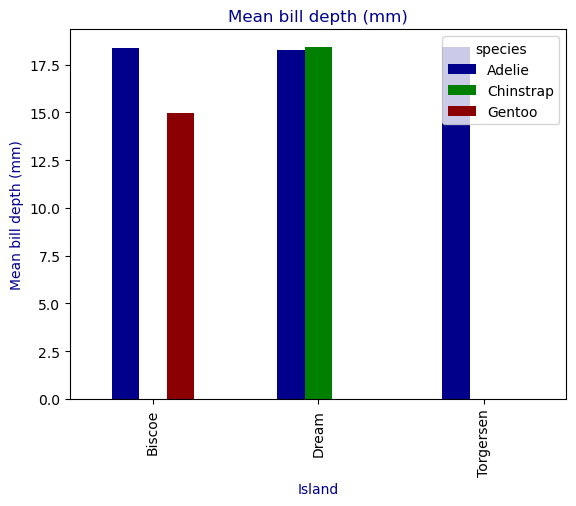

In [46]:
# bar chart bill depth by island and species
df.groupby(['island', 'species'])['bill_depth_mm'].mean().unstack().plot(kind='bar', color=['darkblue', 'green', 'darkred'])
plt.ylabel('Mean bill depth (mm)', color='darkblue')
plt.xlabel('Island', color='darkblue')
plt.title('Mean bill depth (mm)', color='darkblue')
plt.show()

In [20]:
# mean flipper length for adelie penguins
mean_flipper_length_adelie = df[df['species'] == 'Adelie']['flipper_length_mm'].mean()
print('Mean flipper length for Adelie penguins:', mean_flipper_length_adelie)

Mean flipper length for Adelie penguins: 189.95364238410596


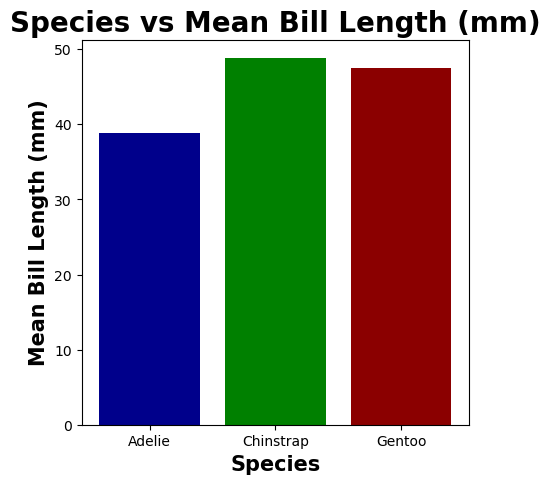

In [ ]:
# create a bar chart of mean bill length by species 
mean_bill_length = df.groupby("species")["bill_length_mm"].mean()
colors = ['darkblue', 'green', 'darkred']
plt.figure(figsize=(5, 5))
plt.bar(mean_bill_length.index, mean_bill_length.values, color=colors)
plt.title("Species vs Mean Bill Length (mm)", fontweight='bold', fontsize=20, color='Black' )
plt.xlabel("Species", fontweight='bold', fontsize=15, color='Black')
plt.ylabel("Mean Bill Length (mm)", fontweight='bold', fontsize=15, color='Black')
plt.show()

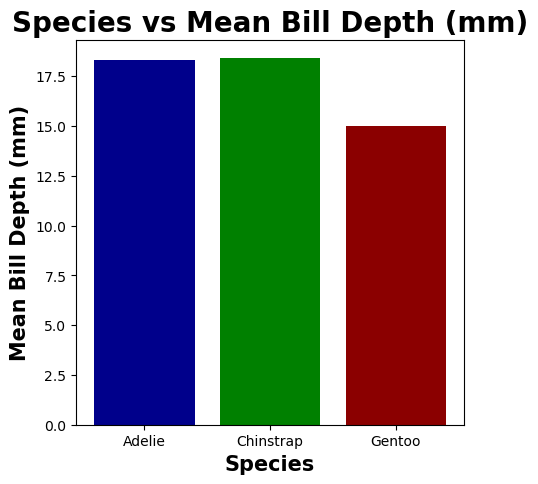

In [ ]:
# create a bar chart of mean bill depth by species
mean_bill_depth = df.groupby("species")["bill_depth_mm"].mean()
colors = ['darkblue', 'green', 'darkred']
plt.figure(figsize=(5, 5))
plt.bar(mean_bill_depth.index, mean_bill_depth.values, color=colors)
plt.title("Species vs Mean Bill Depth (mm)", fontweight='bold', fontsize=20, color='Black' )
plt.xlabel("Species", fontweight='bold', fontsize=15, color='Black')
plt.ylabel("Mean Bill Depth (mm)", fontweight='bold', fontsize=15, color='Black')
plt.show()

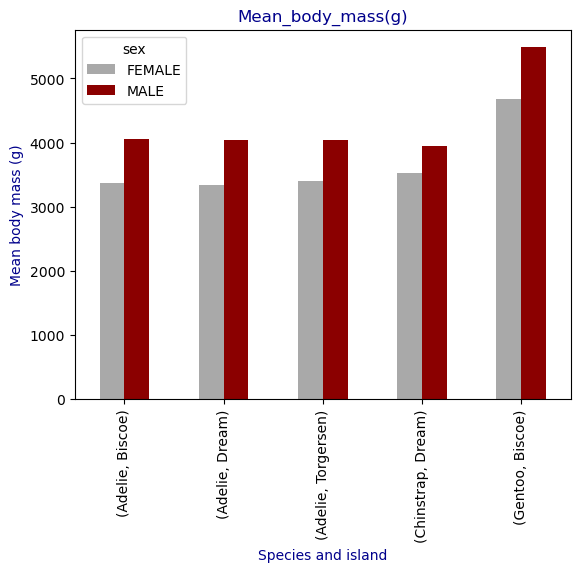

In [47]:
# bar chart body mass by island and species
df.groupby(['species', 'island', 'sex'])['body_mass_g'].mean().unstack().plot(kind='bar', color=[ 'darkgrey', 'darkred'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean body mass (g)', color='darkblue')
plt.title('Mean_body_mass(g)', color='darkblue')
plt.show()

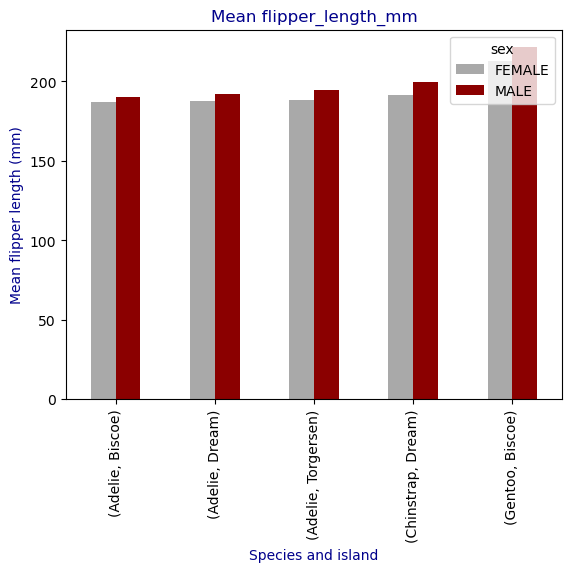

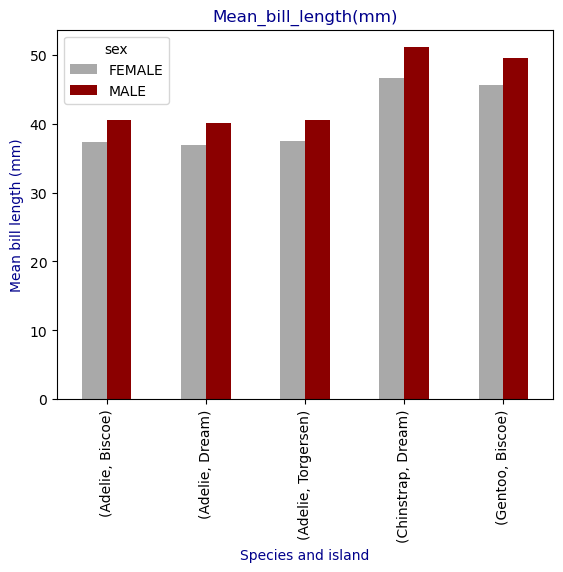

In [50]:
# bar chart bill length by island and species
df.groupby(['species', 'island', 'sex'])['bill_length_mm'].mean().unstack().plot(kind='bar', color=[ 'darkgrey', 'darkred'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean bill length (mm)', color='darkblue')
plt.title('Mean_bill_length(mm)', color='darkblue')
plt.show()

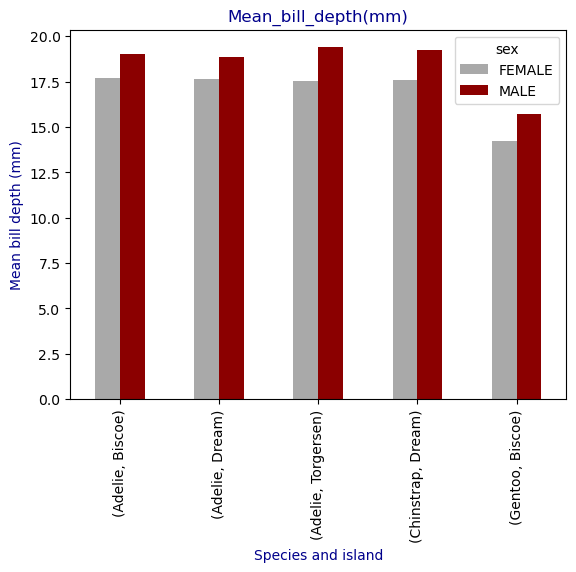

In [51]:
# bar chart bill depth by island and species
df.groupby(['species', 'island', 'sex'])['bill_depth_mm'].mean().unstack().plot(kind='bar', color=[ 'darkgrey', 'darkred'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean bill depth (mm)', color='darkblue')
plt.title('Mean_bill_depth(mm)', color='darkblue')
plt.show()

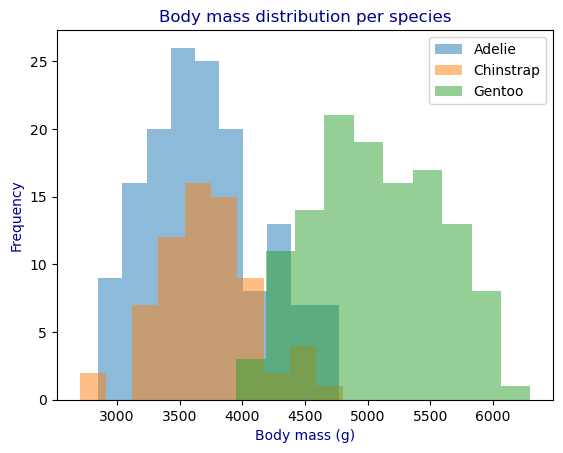

In [52]:
# plot histogram of body mass per species
df.groupby('species')['body_mass_g'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Body mass (g)', color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.title('Body mass distribution per species', color='darkblue')
plt.show()

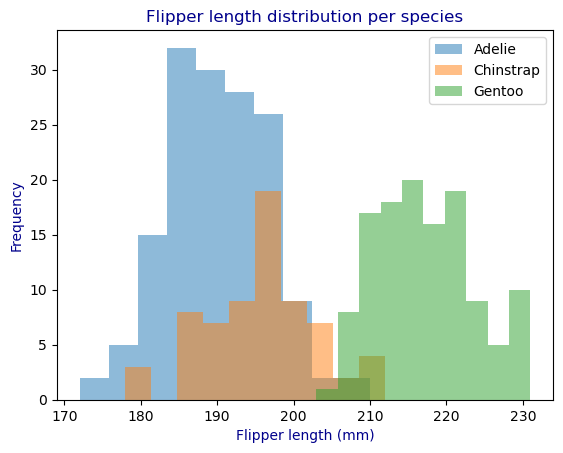

In [53]:
# plot histogram of flipper length per species
df.groupby('species')['flipper_length_mm'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Flipper length (mm)', color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.title('Flipper length distribution per species',color='darkblue')
plt.show()

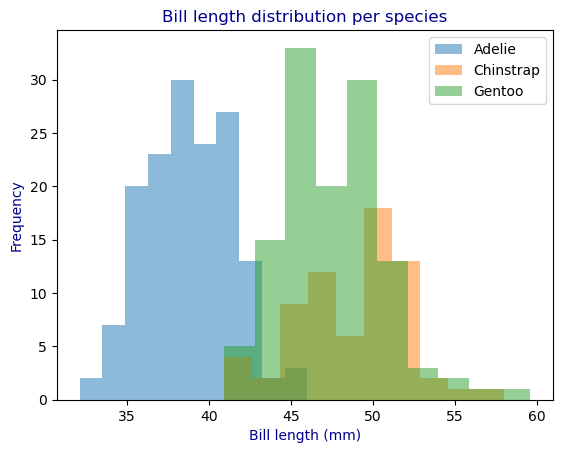

In [54]:
# plot histogram of bill length per species
df.groupby('species')['bill_length_mm'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Bill length (mm)', color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.title('Bill length distribution per species', color='darkblue')
plt.show()

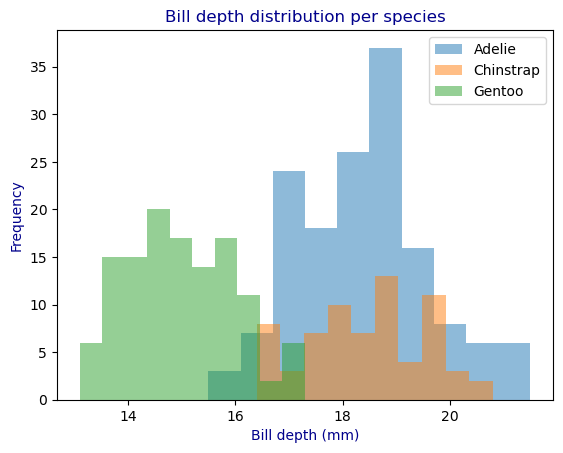

In [57]:
# plot histogram of bill depth per species
df.groupby('species')['bill_depth_mm'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Bill depth (mm)', color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.title('Bill depth distribution per species', color='darkblue')
plt.show()

c:\Users\louis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\louis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\louis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\louis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

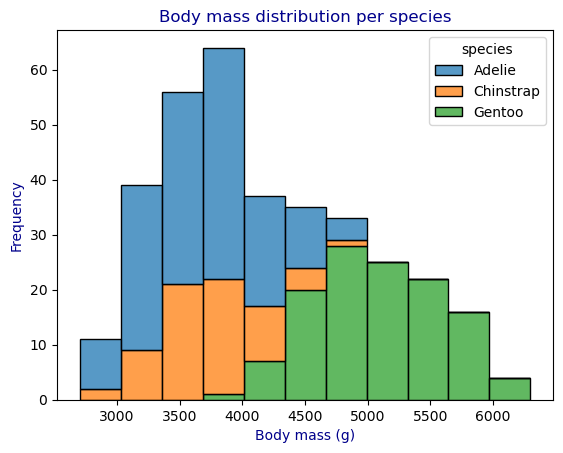

In [58]:
# plot histograms in sns    
sns.histplot(df, x='body_mass_g', hue='species', multiple='stack')
plt.xlabel('Body mass (g)', color='darkblue')
plt.ylabel('Frequency', color='darkblue')
plt.title('Body mass distribution per species', color='darkblue')
plt.show()